# What kind of car should I buy to reduce my fuel expenses?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

### Average Fuel Price per Gallon in 2022 (U.S)

In [2]:
gas = pd.read_csv('2022 Gas Prices.csv')
gas['Avg Gas Price (US)'] = pd.to_numeric(gas['Avg Gas Price (US)'].str.strip())
gas['Date'] = pd.to_datetime(gas['Date'])
gas.head()

,Date,Avg Gas Price (US)
0,2022-01-03,3.281
1,2022-01-10,3.295
2,2022-01-17,3.306
3,2022-01-24,3.323
4,2022-01-31,3.368


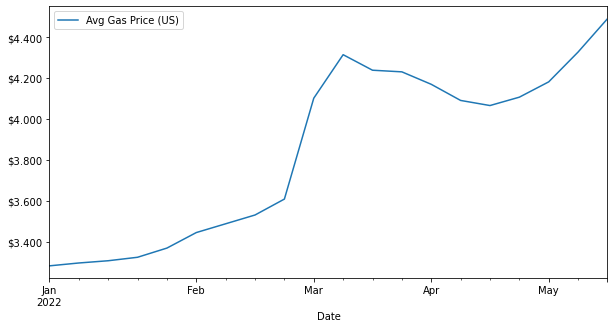

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
gas.plot(x="Date", y="Avg Gas Price (US)", ax=ax)
fmt = '${x:,.3f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.show()

### 2022 Vehicle Fuel Specifications

In [4]:
df = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [5]:
df['Fuel'] = df['Fuel Type']
df['Fuel'].replace({'Z': 'Premium', 'X': 'Regular', 'E': 'Flex', 'D': 'Diesel'}, inplace=True)

In [6]:
df['MPG city'] = ((100 * 3.785411784) / (1.609344 * df['Fuel Consumption (City (L/100 km)'])).astype(int)
df['MPG hwy'] = ((100 * 3.785411784) / (1.609344 * df['Fuel Consumption(Hwy (L/100 km))'])).astype(int)
df.rename(columns={'Fuel Consumption(Comb (mpg))': 'MPG combined'}, inplace=True)

In [7]:
class_dict = {'Compact': 'Compact', 
              'SUV: Small': 'SUV', 
              'Mid-size': 'Mid-size', 
              'Minicompact': 'Compact',
              'SUV: Standard': 'SUV', 
              'Two-seater': 'Compact', 
              'Subcompact': 'Compact',
              'Station wagon: Small': 'Compact', 
              'Station wagon: Mid-size': 'Mid-size', 
              'Full-size': 'Full-size',
              'Pickup truck: Small': 'Pickup truck', 
              'Pickup truck: Standard': 'Pickup truck', 
              'Minivan': 'SUV',
              'Special purpose vehicle': 'SUV'}
df['Subclass'] = df['Vehicle Class']
df['Vehicle Class'].replace(class_dict, inplace=True)

In [8]:
df['Make_Model'] = df['Make'] + ' - ' + df['Model']

### Top 10 Manufacturers for Fuel Efficiency

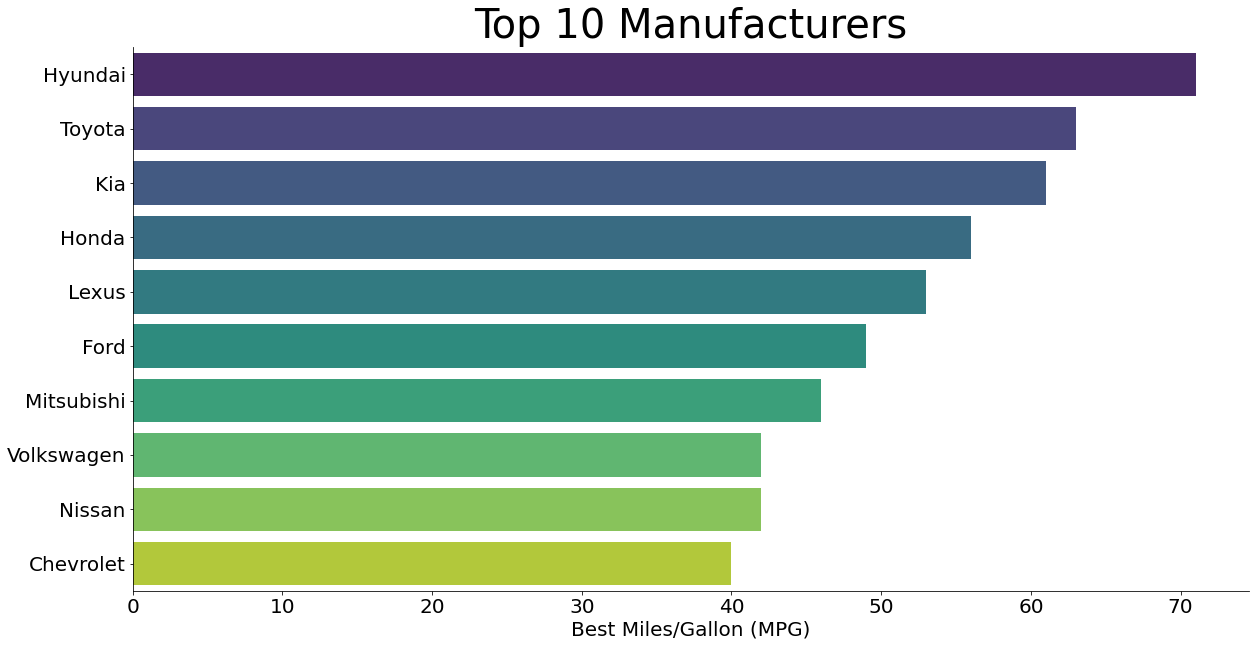

In [9]:
df_sub = df.groupby(['Make'])['MPG combined'].max().reset_index().sort_values('MPG combined', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.barplot(y="Make", x="MPG combined", orient='h',
            data=df_sub, palette="viridis",
            ax=ax)
g.set_title('Top 10 Manufacturers',fontsize=40)
g.set_ylabel('')
g.set_xlabel('Best Miles/Gallon (MPG)', fontsize=20)
sns.despine()
plt.tick_params(labelsize=20)
plt.show()

### Miles Per Gallon (MPG) by Vehicle Class and Fuel Type

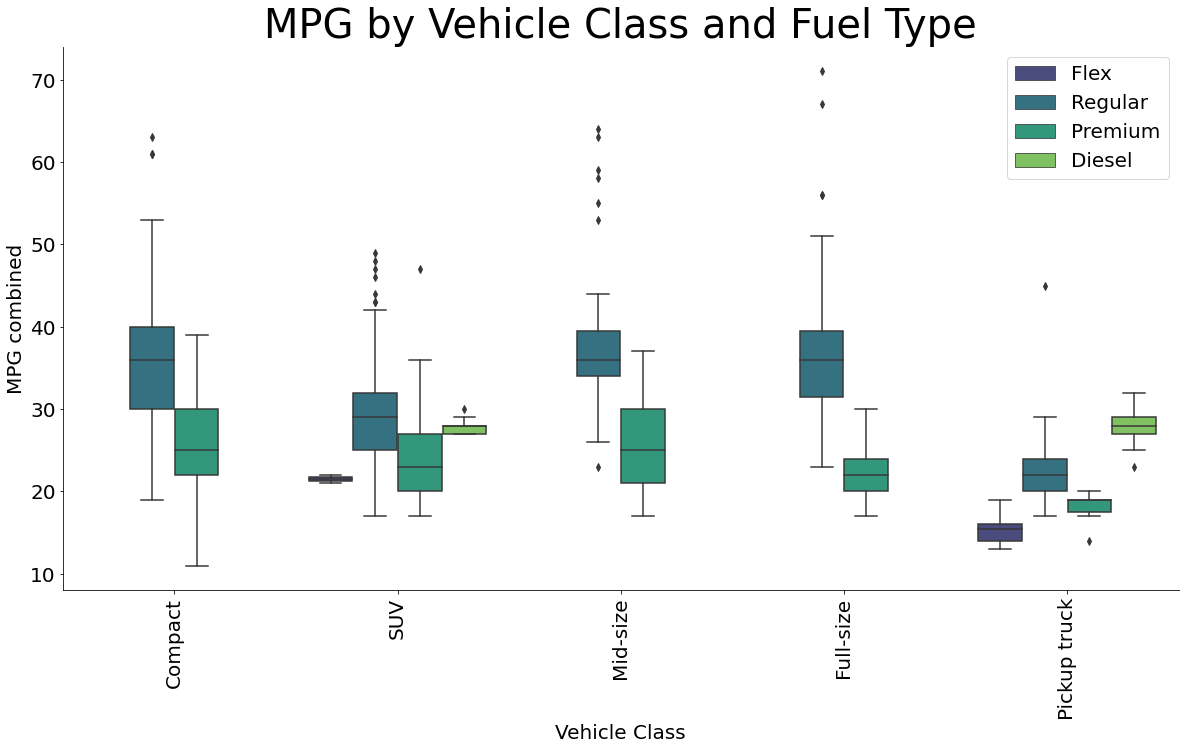

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.boxplot(x="Vehicle Class", y="MPG combined",
            hue="Fuel", palette="viridis",
            hue_order = ['Flex', 'Regular', 'Premium', 'Diesel'], 
            data=df,
            ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.tick_params(axis='x', rotation=90)
g.legend_.set_title(None)
g.set_title('MPG by Vehicle Class and Fuel Type', fontsize=40)
g.set_xlabel('Vehicle Class', fontsize=20)
g.set_ylabel('MPG combined', fontsize=20)
sns.despine()
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

### Average Miles Per Gallon by Fuel Type and Cylinders

In [11]:
df_fc = pd.pivot_table(df, index='Fuel', columns='Cylinders', values=['MPG combined'])
df_fc.fillna(0, inplace=True)

fuel = df_fc.index.values
cylinders_3 = df_fc[('MPG combined', 3)].values
cylinders_4 = df_fc[('MPG combined', 4)].values
cylinders_6 = df_fc[('MPG combined', 6)].values
cylinders_8 = df_fc['MPG combined', 8].values
fuel = [*fuel, fuel[0]]
cylinders_3 = [*cylinders_3, cylinders_3[0]]
cylinders_4 = [*cylinders_4, cylinders_4[0]]
cylinders_6 = [*cylinders_6, cylinders_6[0]]
cylinders_8 = [*cylinders_8, cylinders_8[0]]

init_notebook_mode(connected=True)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=cylinders_3, theta=fuel, name='3-cylinders'),
        go.Scatterpolar(r=cylinders_4, theta=fuel, name='4-cylinders'),
        go.Scatterpolar(r=cylinders_6, theta=fuel, name='6-cylinders'),
        go.Scatterpolar(r=cylinders_8, theta=fuel, name='8-cylinders')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Average MPG by Fuel Type and Cylinders'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.iplot(fig)

### Average Miles Per Gallon (MPG) by Cylinders and Fuel Type

In [12]:
df_fc = pd.pivot_table(df, index='Cylinders', columns='Fuel', values=['MPG combined'])
df_fc.fillna(0, inplace=True)

cylinders = df_fc.index.values.astype(str)
flex = df_fc[('MPG combined', 'Flex')].values
regular = df_fc[('MPG combined', 'Regular')].values
premium = df_fc['MPG combined', 'Premium'].values
diesel = df_fc['MPG combined', 'Diesel'].values
cylinders = [*cylinders, cylinders[0]]
flex = [*flex, flex[0]]
regular = [*regular, regular[0]]
premium = [*premium, premium[0]]
diesel = [*diesel, diesel[0]]

init_notebook_mode(connected=True)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=flex, theta=cylinders, name='Flex'),
        go.Scatterpolar(r=regular, theta=cylinders, name='Regular'),
        go.Scatterpolar(r=premium, theta=cylinders, name='Premium'),
        go.Scatterpolar(r=diesel, theta=cylinders, name='Diesel')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Average MPG by Fuel Type and Cylinders'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.iplot(fig)

### Average Miles Per Gallon (MPG) by Vehicle Class and Fuel Type

In [13]:
df_fc = pd.pivot_table(df, index='Fuel', columns='Vehicle Class', values=['MPG combined'])
df_fc.fillna(0, inplace=True)

fuel = df_fc.index.values
compact = df_fc[('MPG combined', 'Compact')].values
midsize = df_fc[('MPG combined', 'Mid-size')].values
fullsize = df_fc[('MPG combined', 'Full-size')].values
suv = df_fc['MPG combined', 'SUV'].values
pickup = df_fc['MPG combined', 'Pickup truck'].values
fuel = [*fuel, fuel[0]]
compact = [*compact, compact[0]]
midsize = [*midsize, midsize[0]]
fullsize = [*fullsize, fullsize[0]]
suv = [*suv, suv[0]]
pickup = [*pickup, pickup[0]]

init_notebook_mode(connected=True)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=compact, theta=fuel, name='Compact'),
        go.Scatterpolar(r=midsize, theta=fuel, name='Mid-size'),
        go.Scatterpolar(r=fullsize, theta=fuel, name='Full-size'),
        go.Scatterpolar(r=suv, theta=fuel, name='SUV'),
        go.Scatterpolar(r=pickup, theta=fuel, name='Pickup truck')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Average MPG by Vehicle Class and Fuel Type'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.iplot(fig)

### Average Miles Per Gallon (MPG) by Fuel Type and Vehicle Class

In [14]:
df_fc = pd.pivot_table(df, index='Vehicle Class', columns='Fuel', values=['MPG combined'])
df_fc.fillna(0, inplace=True)

vehicle_class = df_fc.index.values
vehicle_class = [*vehicle_class, vehicle_class[0]]
flex = df_fc[('MPG combined', 'Flex')].values
regular = df_fc[('MPG combined', 'Regular')].values
premium = df_fc['MPG combined', 'Premium'].values
diesel = df_fc['MPG combined', 'Diesel'].values
flex = [*flex, flex[0]]
regular = [*regular, regular[0]]
premium = [*premium, premium[0]]
diesel = [*diesel, diesel[0]]

init_notebook_mode(connected=True)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=flex, theta=vehicle_class, name='Flex'),
        go.Scatterpolar(r=regular, theta=vehicle_class, name='Regular'),
        go.Scatterpolar(r=premium, theta=vehicle_class, name='Premium'),
        go.Scatterpolar(r=diesel, theta=vehicle_class, name='Diesel')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Average MPG by Vehicle Class and Fuel Type'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.iplot(fig)

### Miles Per Gallon (MPG) by Vehicle Make and Engine Type

In [15]:
df_mcf = df.groupby(['Make', 'Cylinders', 'Fuel'])['MPG combined'].max().reset_index()
df_mcf = df_mcf.reset_index()
df_mcf.head()

,index,Make,Cylinders,Fuel,MPG combined
0,0,Acura,4,Premium,33
1,1,Acura,6,Premium,26
2,2,Alfa Romeo,4,Premium,32
3,3,Alfa Romeo,6,Premium,24
4,4,Aston Martin,8,Premium,25


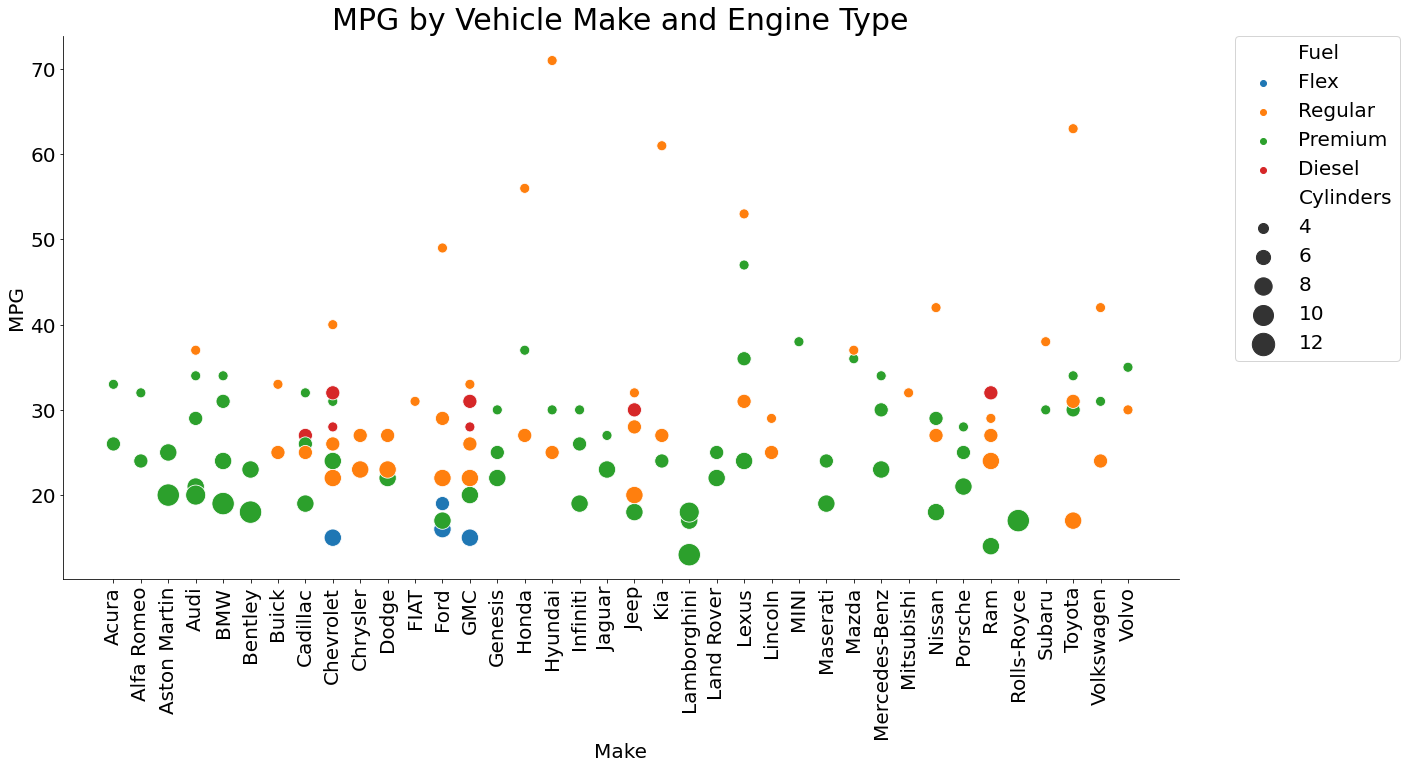

In [16]:
df_mcf = df[df['Cylinders'].isin([4, 6, 8, 10, 12])].groupby(['Make', 'Cylinders', 'Fuel'])['MPG combined'].max().reset_index()
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.scatterplot(x="Make", y="MPG combined",
            size="Cylinders", 
            sizes=(100, 500), 
            hue = "Fuel",
            hue_order = ['Flex', 'Regular', 'Premium', 'Diesel'], 
            data=df_mcf,
            ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.tick_params(axis='x', rotation=90)
g.legend_.set_title(None)
g.set_title('MPG by Vehicle Make and Engine Type', fontsize=30)
g.set_xlabel('Make', fontsize=20)
g.set_ylabel('MPG', fontsize=20)
sns.despine()
plt.tick_params(labelsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Miles Per Gallon by Vehicle Class and Cylinders

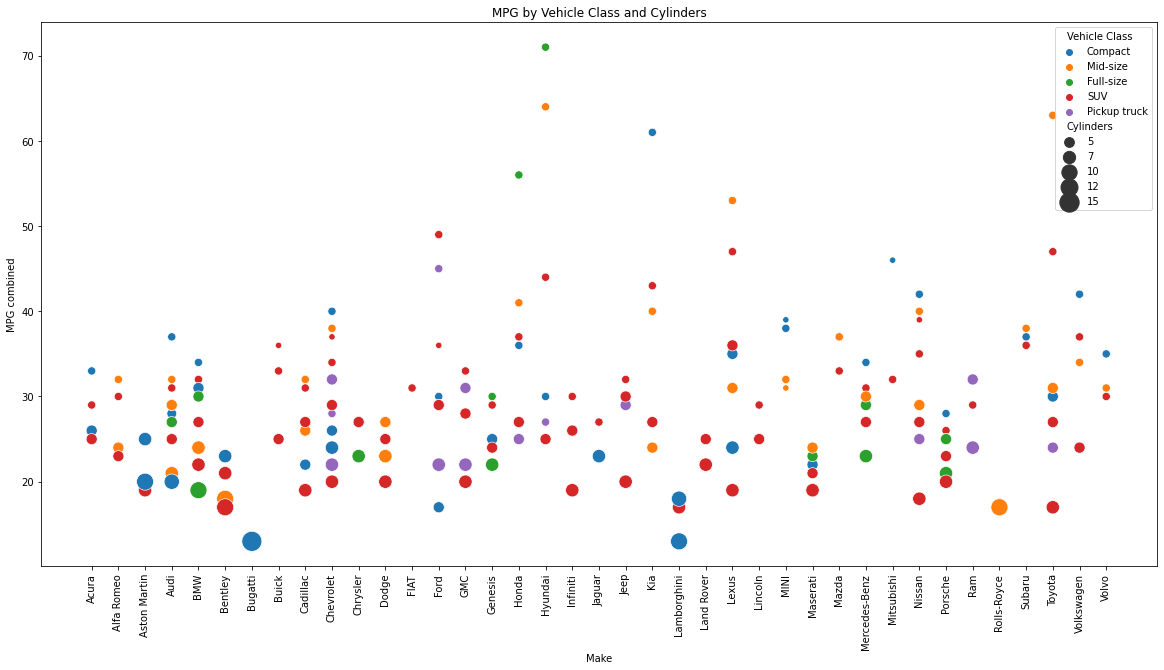

In [17]:
df_mcv = df.groupby(['Make', 'Cylinders', 'Vehicle Class'])['MPG combined'].max().reset_index()
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.scatterplot(x="Make", y="MPG combined",
            size="Cylinders", 
            sizes=(40, 400), # alpha=.5, # palette="muted",
            hue = "Vehicle Class",
            hue_order = ['Compact', 'Mid-size', 'Full-size', 'SUV', 'Pickup truck'], 
            data=df_mcv,
            ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.tick_params(axis='x', rotation=90)
g.legend_.set_title(None)
g.set_title('MPG by Vehicle Class and Cylinders')
g.set_xlabel('Make')
g.set_ylabel('MPG combined')
plt.show()

### Top Pickup Trucks

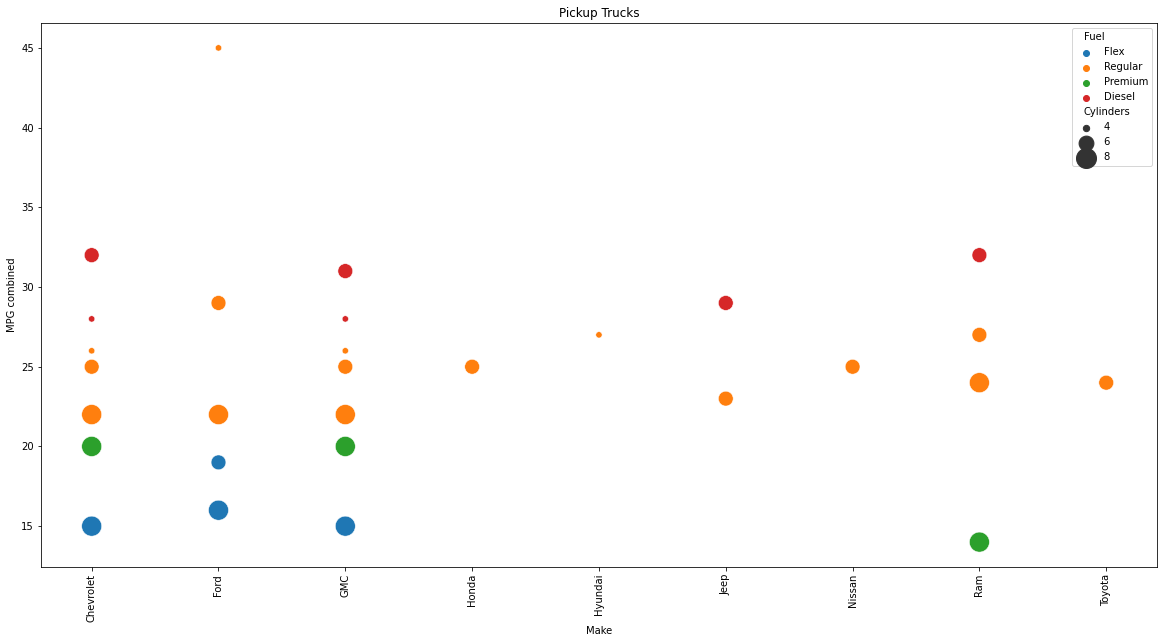

In [18]:
df_mcf = df[df['Vehicle Class']=='Pickup truck'].groupby(['Make', 'Cylinders', 'Fuel'])['MPG combined'].max().reset_index()
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.scatterplot(x="Make", y="MPG combined",
            size="Cylinders", 
            sizes=(40, 400), 
            hue = "Fuel",
            hue_order = ['Flex', 'Regular', 'Premium', 'Diesel'], 
            data=df_mcf,
            ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.tick_params(axis='x', rotation=90)
g.legend_.set_title(None)
g.set_title('Pickup Trucks')
g.set_xlabel('Make')
g.set_ylabel('MPG combined')
plt.show()

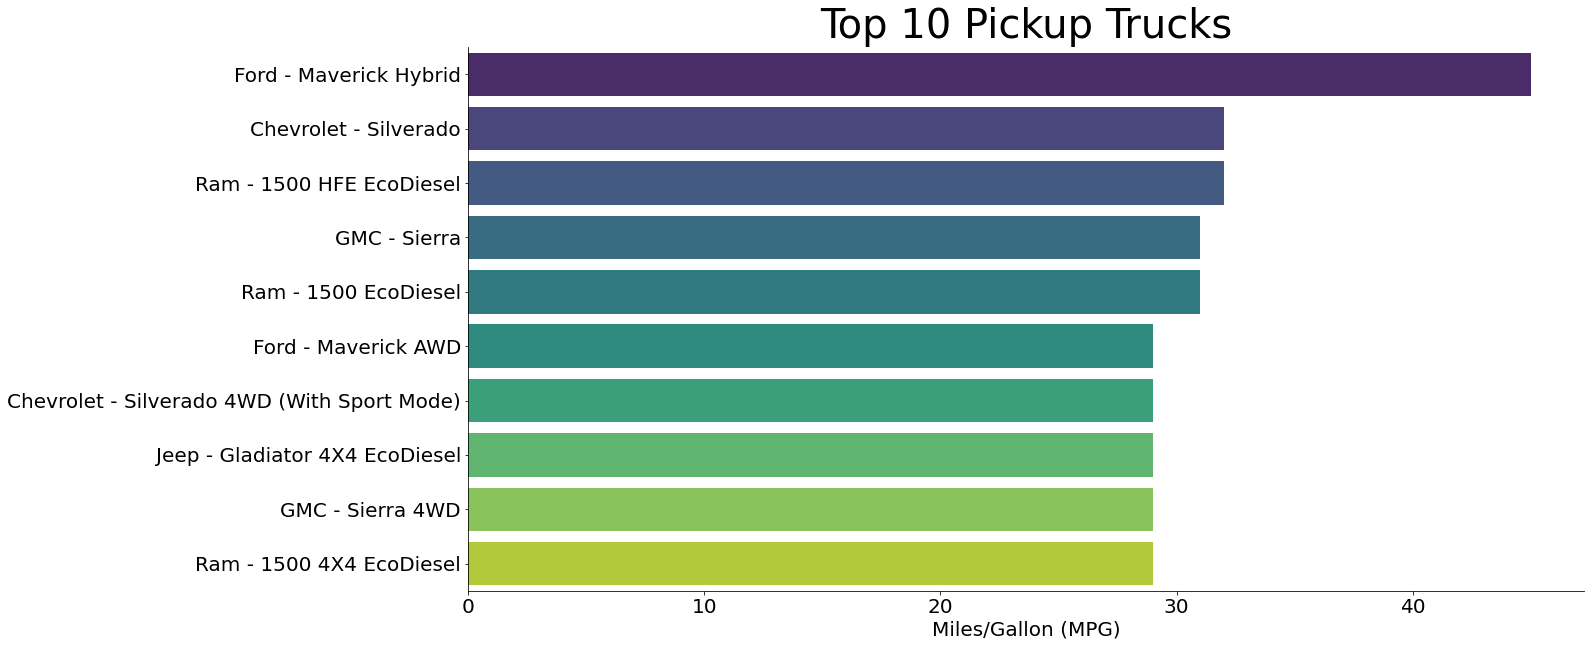

In [19]:
df_mcf = df[df['Vehicle Class']=='Pickup truck'].sort_values('MPG combined', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.barplot(y="Make_Model", x="MPG combined", orient='h',
            data=df_mcf, palette="viridis",
            ax=ax)
g.set_title('Top 10 Pickup Trucks',fontsize=40)
g.set_ylabel('')
g.set_xlabel('Miles/Gallon (MPG)', fontsize=20)
sns.despine()
plt.tick_params(labelsize=20)
plt.show()

### Top Compact Cars

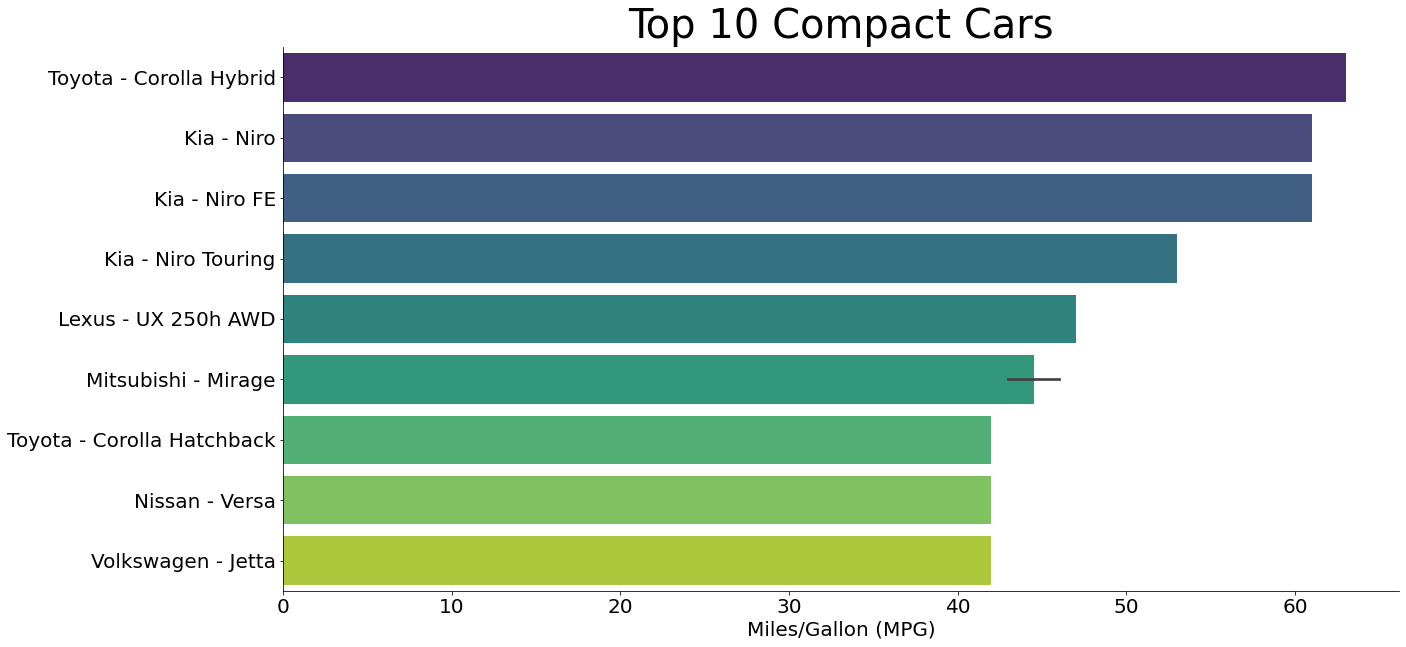

In [20]:
df_mcf = df[df['Vehicle Class']=='Compact'].sort_values('MPG combined', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.barplot(y="Make_Model", x="MPG combined", orient='h',
            data=df_mcf, palette="viridis",
            ax=ax)
g.set_title('Top 10 Compact Cars',fontsize=40)
g.set_ylabel('')
g.set_xlabel('Miles/Gallon (MPG)', fontsize=20)
sns.despine()
plt.tick_params(labelsize=20)
plt.show()

### Top Mid-Size Vehicles

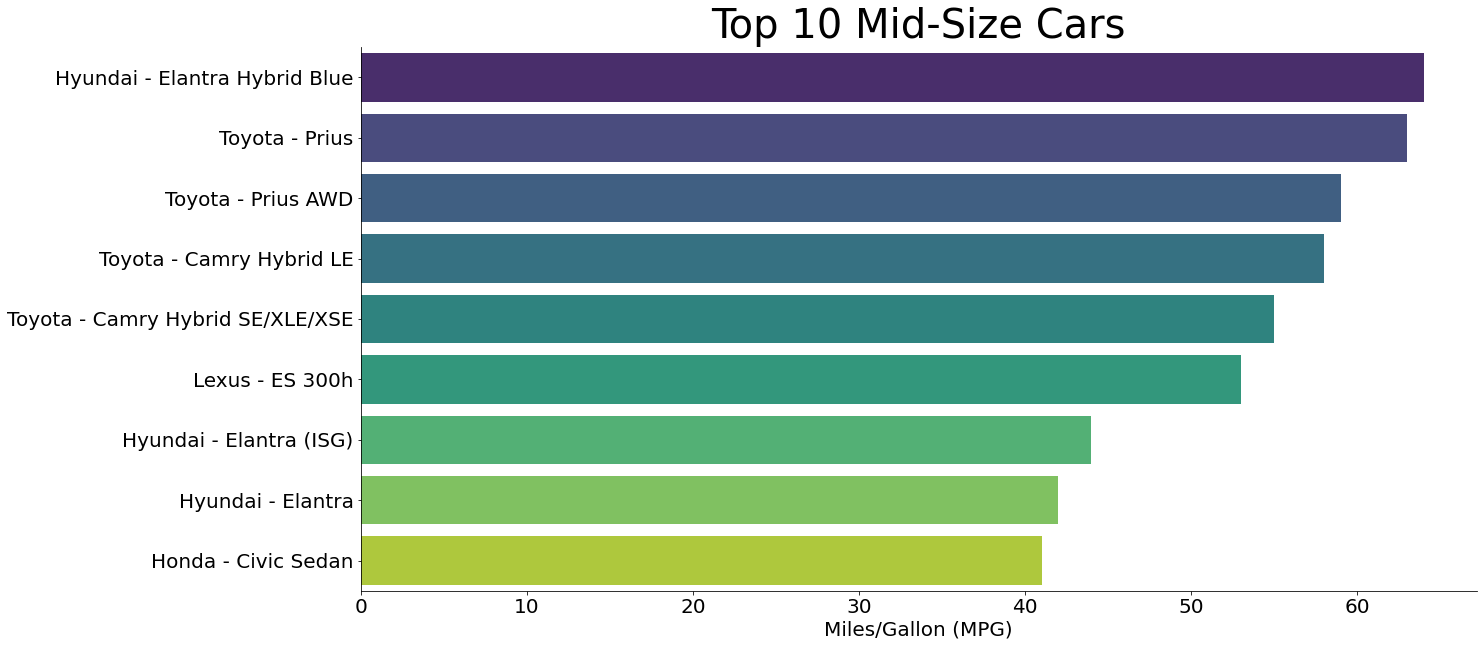

In [21]:
df_mcf = df[df['Vehicle Class']=='Mid-size'].sort_values('MPG combined', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.barplot(y="Make_Model", x="MPG combined", orient='h',
            data=df_mcf, palette="viridis",
            ax=ax)
g.set_title('Top 10 Mid-Size Cars',fontsize=40)
g.set_ylabel('')
g.set_xlabel('Miles/Gallon (MPG)', fontsize=20)
sns.despine()
plt.tick_params(labelsize=20)
plt.show()

### Top Full-Size Vehicles

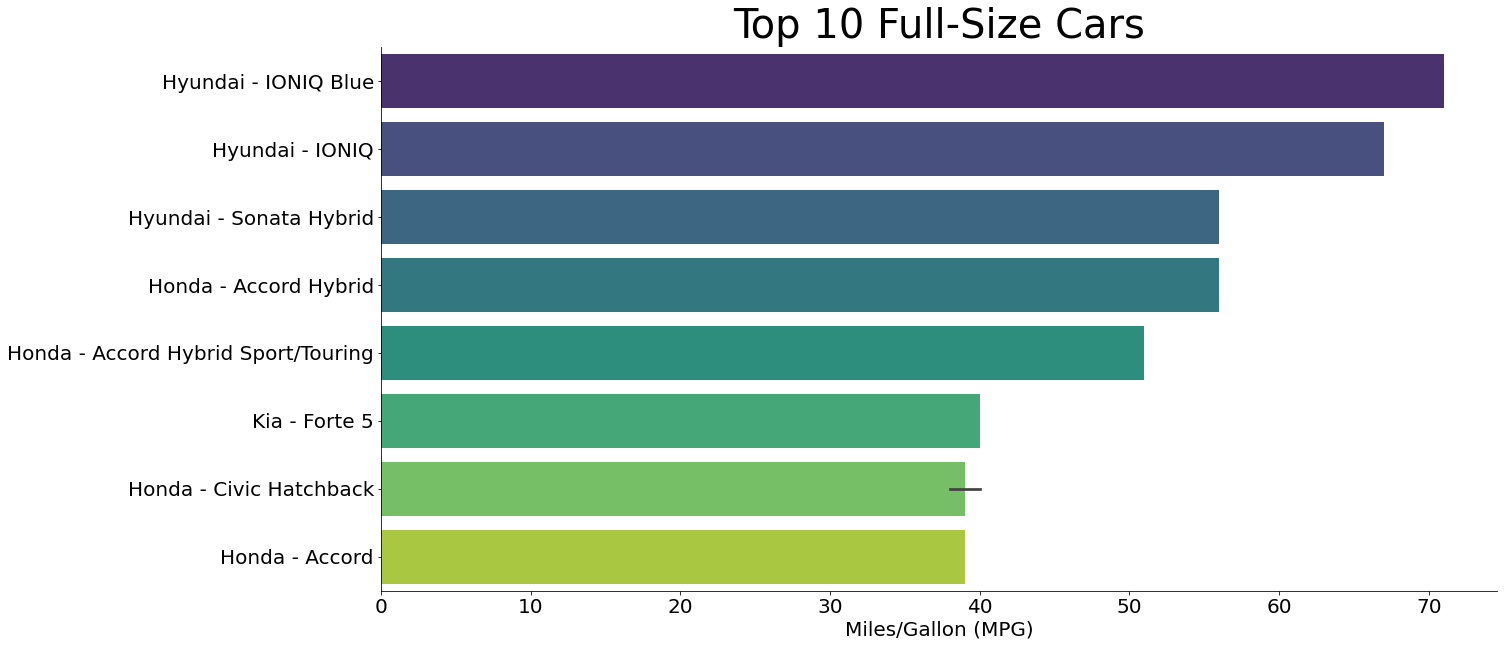

In [22]:
df_mcf = df[df['Vehicle Class']=='Full-size'].sort_values('MPG combined', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.barplot(y="Make_Model", x="MPG combined", orient='h',
            data=df_mcf, palette="viridis",
            ax=ax)
g.set_title('Top 10 Full-Size Cars',fontsize=40)
g.set_ylabel('')
g.set_xlabel('Miles/Gallon (MPG)', fontsize=20)
sns.despine()
plt.tick_params(labelsize=20)
plt.show()

### Top Sport Utility Vehicles

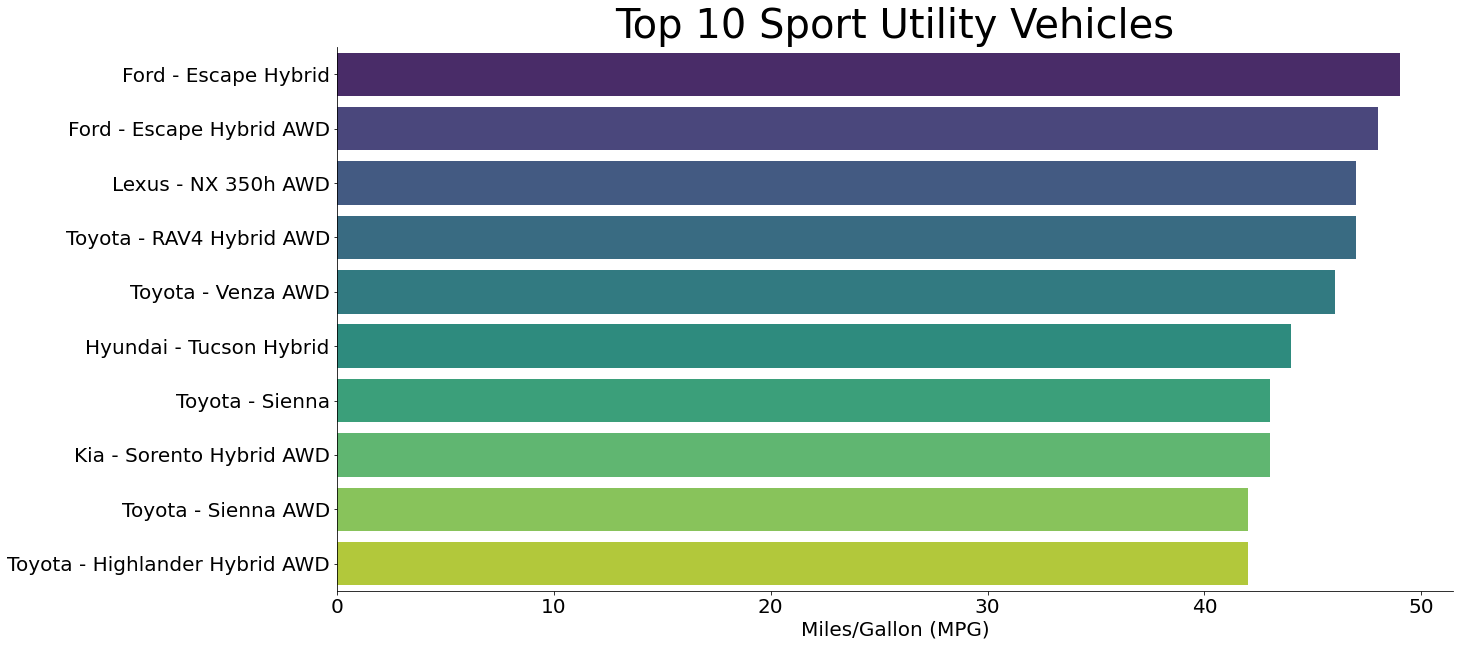

In [23]:
df_mcf = df[df['Vehicle Class']=='SUV'].sort_values('MPG combined', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(20, 10))    
g = sns.barplot(y="Make_Model", x="MPG combined", orient='h',
            data=df_mcf, palette="viridis",
            ax=ax)
g.set_title('Top 10 Sport Utility Vehicles',fontsize=40)
g.set_ylabel('')
g.set_xlabel('Miles/Gallon (MPG)', fontsize=20)
sns.despine()
plt.tick_params(labelsize=20)
plt.show()

### Miles Per Gallon by Vehicle Class and Fuel Type

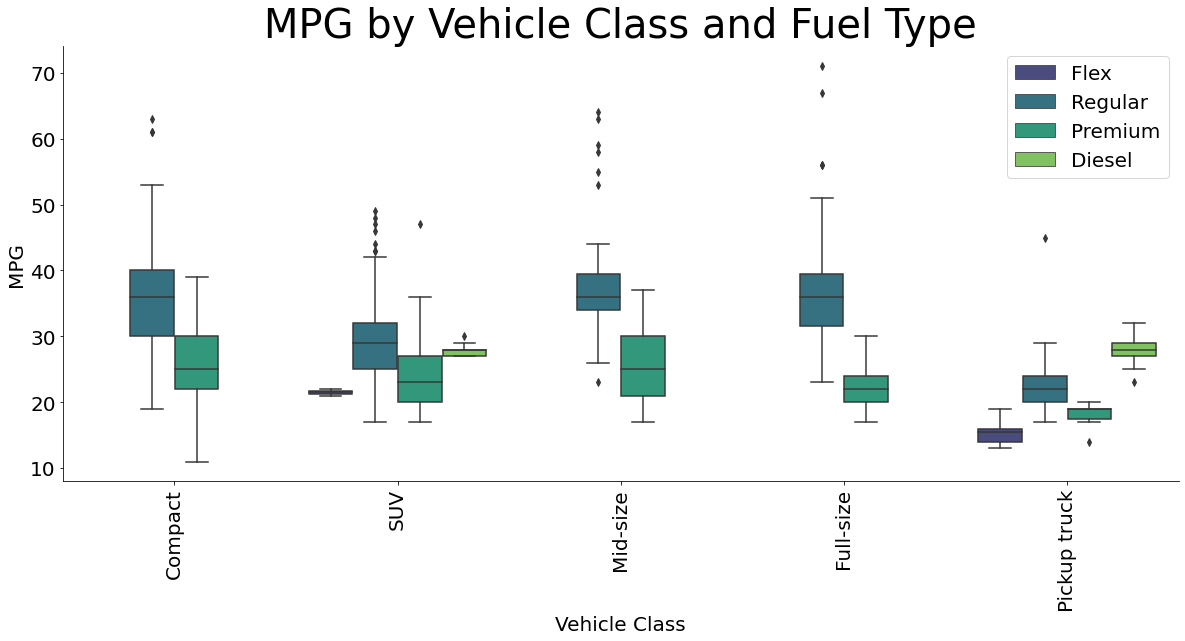

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))    
g = sns.boxplot(x="Vehicle Class", y="MPG combined",
            hue="Fuel", palette="viridis",
            hue_order = ['Flex', 'Regular', 'Premium', 'Diesel'], 
            data=df,
            ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.tick_params(axis='x', rotation=90)
# ax.set_facecolor('white')
g.legend_.set_title(None)
g.set_title('MPG by Vehicle Class and Fuel Type', fontsize=40)
g.set_xlabel('Vehicle Class', fontsize=20)
g.set_ylabel('MPG', fontsize=20)
sns.despine()
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

### Top 10 Fuel Efficient Vehicles of 2022

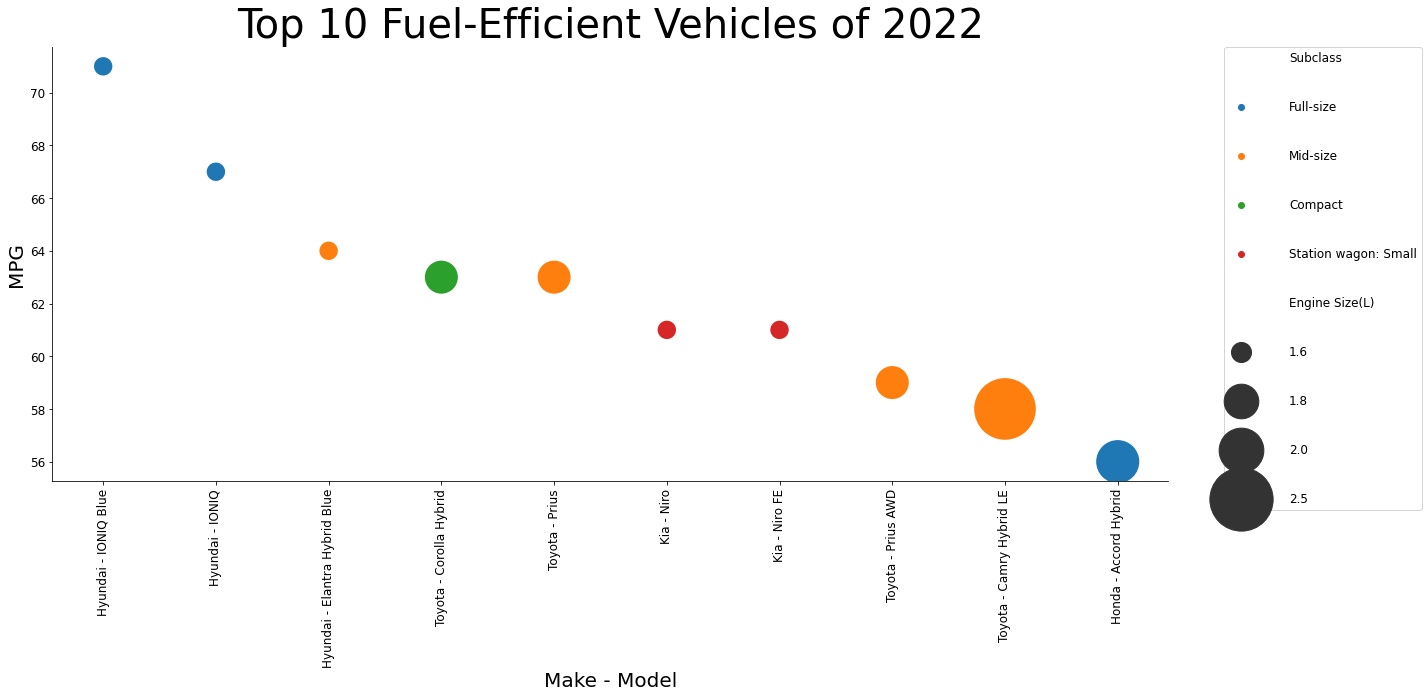

In [25]:
df_mcf = df.sort_values('MPG combined', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(20, 8))    
g = sns.scatterplot(x="Make_Model", y="MPG combined",
            size="Engine Size(L)", 
            sizes=(400, 4000), # alpha=.5, # palette="muted",
            hue = "Subclass",
            # hue_order = ['Flex', 'Regular', 'Premium', 'Diesel'], 
            data=df_mcf,
            ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.tick_params(axis='x', rotation=90)
g.legend_.set_title(None)
# g.legend_.labelspacing(20)
g.set_title('Top 10 Fuel-Efficient Vehicles of 2022', fontsize=40)
g.set_xlabel('Make - Model', fontsize=20)
g.set_ylabel('MPG', fontsize=20)
sns.despine()
plt.tick_params(labelsize=12)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labelspacing=3, handletextpad=3)
plt.show()

### Potential Fuel Savings Per Year

In [26]:
avg_mpg = int(df['MPG combined'].mean())
best_mpg = int(df['MPG combined'].max())
worst_mpg = int(df['MPG combined'].min())
miles_per_year = list(range(1000, 31000, 1000))
gas_price = gas[gas.Date == gas.Date.max()]['Avg Gas Price (US)'].values[0]
avg_fuel_cost = [x / avg_mpg * gas_price for x in miles_per_year]
best_fuel_cost = [x / best_mpg * gas_price for x in miles_per_year]
worst_fuel_cost = [x / worst_mpg * gas_price for x in miles_per_year]

In [27]:
df[df['MPG combined'] == df['MPG combined'].min()]

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),MPG combined,CO2 Emissions(g/km),CO2 Rating,Smog Rating,Fuel,MPG city,MPG hwy,Subclass,Make_Model
133,2022,Bugatti,Chiron Pur Sport,Compact,8.0,16,AM7,Z,30.3,20.9,26.1,11,608,1,1,Premium,7,11,Two-seater,Bugatti - Chiron Pur Sport
134,2022,Bugatti,Chiron Super Sport,Compact,8.0,16,AM7,Z,30.3,20.9,26.1,11,608,1,1,Premium,7,11,Two-seater,Bugatti - Chiron Super Sport


In [28]:
df[df['MPG combined'] == df['MPG combined'].max()]

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),MPG combined,CO2 Emissions(g/km),CO2 Rating,Smog Rating,Fuel,MPG city,MPG hwy,Subclass,Make_Model
460,2022,Hyundai,IONIQ Blue,Full-size,1.6,4,AM6,X,4.0,3.9,4.0,71,94,10,7,Regular,58,60,Full-size,Hyundai - IONIQ Blue


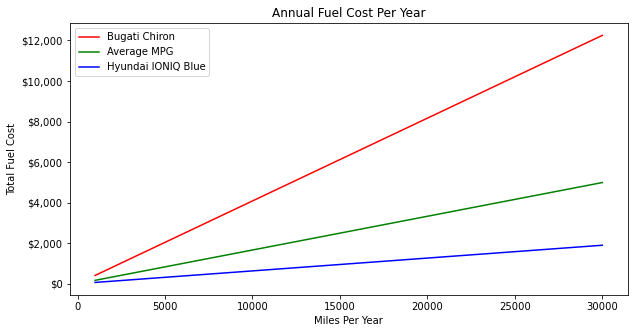

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(miles_per_year, worst_fuel_cost, label='Bugati Chiron', color='red')
plt.plot(miles_per_year, avg_fuel_cost, label='Average MPG', color='green')
plt.plot(miles_per_year, best_fuel_cost, label='Hyundai IONIQ Blue', color='blue')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Miles Per Year')
plt.ylabel('Total Fuel Cost')
plt.title('Annual Fuel Cost Per Year')
plt.legend()
plt.show()